<h1>Imports</h1>

In [1]:
import pandas as pd
import os,sys
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from string import digits
from tqdm import tqdm
import numpy as np
from tensorflow.keras import datasets, layers, models
# 
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')

<h2>Reading the file </h2>

In [2]:
labels=pd.read_csv("trainLabels.csv")

In [3]:
labels.head()
label=labels["label"].tolist()
set(label)
Cleaning=False

<h3>Changing the filename to desired Labels</h3>
Multiplies instance of same image were given unique names by attaching a unique number to each label e.g frog21,frog33,truck22,truck223.

In [4]:
#Changing the filename
os.chdir(r"C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\train")
directory=(r"C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\train")
if Cleaning:
    for i in range(1,50001):
            os.rename(str(i)+'.png',label[i-1]+"{}".format(i-1)+".png")


<h4>Redundant method</h4>
I tried to resize and convert the images onto a grayscale but this method was a failure,attached code is just for reference.

In [5]:
path = r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\edited_3'
os.chdir(path)
if Cleaning:##Not usefull method ,combine converting images and making assoicated arrays together is better as shown below
    for filename in os.listdir(dircetory):
        file='\{}'.format(filename)
        dirs=os.path.join(directory+file)
        img_rgb = cv2.imread(dirs)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        im_ff=cv2.resize(img_gray,(24,24))
        cv2.imwrite(filename, im_ff)
    
    


<h5>Making the data</h5>
I directly read the files(images),converted the images' data into an 3D-Array. The exception was given so that the data making process is not stopped due to corrput file(which is always a possibility).Please note as mentioned there are multiplies instance of frog(label) so I named different images of frog with a unique number e.g frog212,frog211.Therefore I read the filename and I removed the digits from the filename(which now,after removing numbers, is actually the label). I then threw some if/elif statement to one-hot ecode the different labels and inserted that data on 1D array.

In [6]:
###
if Cleaning:
    X=[]
    y=[]
    os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
    for filename in tqdm(os.listdir(path)):
        file='\{}'.format(filename)
        dirs=os.path.join(path+file)
        try:
            img_rgb = cv2.imread(dirs)
            X.append(list(img_rgb))
        except TypeError:
            continue
        remove_digits = str.maketrans('', '', digits)
        res = filename.translate(remove_digits)
        if 'airplane.png'==res:
            y.append([1,0,0,0,0,0,0,0,0,0])
        elif 'automobile.png'==res:
            y.append([0,1,0,0,0,0,0,0,0,0])
        elif 'bird.png'==res:
            y.append([0,0,1,0,0,0,0,0,0,0])
        elif 'cat.png'==res:
            y.append([0,0,0,1,0,0,0,0,0,0])
        elif 'deer.png'==res:
            y.append([0,0,0,0,1,0,0,0,0,0])
        elif 'dog.png'==res:
            y.append([0,0,0,0,0,1,0,0,0,0])
        elif 'frog.png'==res:
            y.append([0,0,0,0,0,0,1,0,0,0])
        elif 'horse.png'==res:
            y.append([0,0,0,0,0,0,0,1,0,0])
        elif 'ship.png'==res:
            y.append([0,0,0,0,0,0,0,0,1,0])
        elif 'truck.png'==res:
            y.append([0,0,0,0,0,0,0,0,0,1])
    X=np.array(X)
    y=np.array(y)
    np.save("X_ARR",X)
    np.save("y_ARR",y)

        
        

In [8]:
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
X=np.load("X_ARR.npy")
y=np.load("y_ARR.npy")
X.shape,y.shape

((50000, 32, 32, 3), (50000, 10))

<h6>Creating A Convolutional Neural Network</h6>
Rest of code is self-explanationary. I created the CNN using TensorFlow2.0. Please note I used Dropout to avoid over-fitting.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_valid,y_valid=X_train[-33:],y_train[-33:]

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='valid',input_shape=(32, 32, 3)))
model.add(layers.Dropout(.1, noise_shape=None, seed=None))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.1, noise_shape=None, seed=None))
model.add(layers.Conv2D(64, (3, 3), padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.2, noise_shape=None, seed=None))
model.add(layers.Conv2D(64, (3, 3), padding='valid',activation='relu'))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

<font size="+2">CNN Architecture</font>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0

<font size="+2">CNN Parameter</font>

In [1]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=25,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])

"Model Trained"

'Model Trained'

<font size="+2">Graphical visualisation of Loss and Accuracy</font>

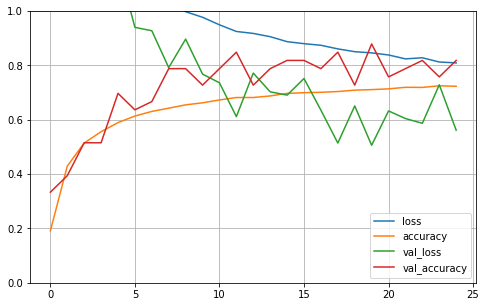

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

<font size="+2">Testing my CNN on some random Images(from Trained Data)</font>

<IPython.core.display.Javascript object>


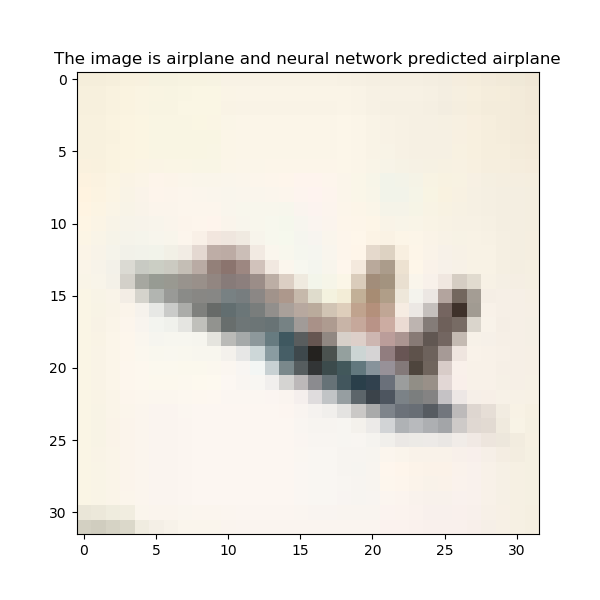

15936/50000 [========>.....................] - ETA: 4:04 - loss: 0.4917 - accuracy: 0.87 - ETA: 1:48 - loss: 0.5635 - accuracy: 0.86 - ETA: 1:23 - loss: 0.5580 - accuracy: 0.84 - ETA: 1:11 - loss: 0.5939 - accuracy: 0.83 - ETA: 59s - loss: 0.6114 - accuracy: 0.8094 - ETA: 53s - loss: 0.6143 - accuracy: 0.807 - ETA: 50s - loss: 0.6449 - accuracy: 0.793 - ETA: 47s - loss: 0.6478 - accuracy: 0.794 - ETA: 45s - loss: 0.6530 - accuracy: 0.789 - ETA: 43s - loss: 0.6483 - accuracy: 0.790 - ETA: 42s - loss: 0.6336 - accuracy: 0.798 - ETA: 41s - loss: 0.6328 - accuracy: 0.800 - ETA: 41s - loss: 0.6249 - accuracy: 0.802 - ETA: 41s - loss: 0.6218 - accuracy: 0.802 - ETA: 40s - loss: 0.6276 - accuracy: 0.801 - ETA: 39s - loss: 0.6298 - accuracy: 0.798 - ETA: 38s - loss: 0.6238 - accuracy: 0.800 - ETA: 37s - loss: 0.6106 - accuracy: 0.805 - ETA: 37s - loss: 0.6020 - accuracy: 0.808 - ETA: 36s - loss: 0.5960 - accuracy: 0.810 - ETA: 36s - loss: 0.5922 - accuracy: 0.813 - ETA: 36s - loss: 0.5914 - ac

32704/50000 [==================>...........] - ETA: 23s - loss: 0.6675 - accuracy: 0.766 - ETA: 23s - loss: 0.6701 - accuracy: 0.765 - ETA: 23s - loss: 0.6730 - accuracy: 0.763 - ETA: 23s - loss: 0.6744 - accuracy: 0.763 - ETA: 23s - loss: 0.6770 - accuracy: 0.761 - ETA: 23s - loss: 0.6786 - accuracy: 0.760 - ETA: 23s - loss: 0.6799 - accuracy: 0.759 - ETA: 23s - loss: 0.6815 - accuracy: 0.759 - ETA: 23s - loss: 0.6839 - accuracy: 0.758 - ETA: 23s - loss: 0.6860 - accuracy: 0.757 - ETA: 23s - loss: 0.6881 - accuracy: 0.756 - ETA: 23s - loss: 0.6901 - accuracy: 0.755 - ETA: 23s - loss: 0.6928 - accuracy: 0.754 - ETA: 23s - loss: 0.6941 - accuracy: 0.754 - ETA: 22s - loss: 0.6969 - accuracy: 0.752 - ETA: 22s - loss: 0.7001 - accuracy: 0.751 - ETA: 22s - loss: 0.7018 - accuracy: 0.750 - ETA: 22s - loss: 0.7038 - accuracy: 0.749 - ETA: 22s - loss: 0.7061 - accuracy: 0.748 - ETA: 22s - loss: 0.7069 - accuracy: 0.748 - ETA: 22s - loss: 0.7089 - accuracy: 0.747 - ETA: 22s - loss: 0.7116 - acc

49088/50000 [============================>.] - ETA: 11s - loss: 0.7266 - accuracy: 0.745 - ETA: 11s - loss: 0.7257 - accuracy: 0.746 - ETA: 11s - loss: 0.7251 - accuracy: 0.746 - ETA: 11s - loss: 0.7246 - accuracy: 0.746 - ETA: 11s - loss: 0.7235 - accuracy: 0.747 - ETA: 11s - loss: 0.7224 - accuracy: 0.747 - ETA: 11s - loss: 0.7219 - accuracy: 0.747 - ETA: 11s - loss: 0.7209 - accuracy: 0.748 - ETA: 11s - loss: 0.7198 - accuracy: 0.748 - ETA: 11s - loss: 0.7191 - accuracy: 0.748 - ETA: 11s - loss: 0.7184 - accuracy: 0.749 - ETA: 11s - loss: 0.7177 - accuracy: 0.749 - ETA: 11s - loss: 0.7173 - accuracy: 0.749 - ETA: 11s - loss: 0.7167 - accuracy: 0.749 - ETA: 11s - loss: 0.7162 - accuracy: 0.750 - ETA: 11s - loss: 0.7156 - accuracy: 0.750 - ETA: 11s - loss: 0.7146 - accuracy: 0.750 - ETA: 11s - loss: 0.7138 - accuracy: 0.751 - ETA: 10s - loss: 0.7133 - accuracy: 0.751 - ETA: 10s - loss: 0.7124 - accuracy: 0.751 - ETA: 10s - loss: 0.7118 - accuracy: 0.751 - ETA: 10s - loss: 0.7108 - acc

50000/50000 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.78 - ETA: 0s - loss: 0.6484 - accuracy: 0.78 - ETA: 0s - loss: 0.6483 - accuracy: 0.78 - ETA: 0s - loss: 0.6478 - accuracy: 0.78 - ETA: 0s - loss: 0.6476 - accuracy: 0.78 - ETA: 0s - loss: 0.6471 - accuracy: 0.78 - ETA: 0s - loss: 0.6467 - accuracy: 0.78 - ETA: 0s - loss: 0.6467 - accuracy: 0.78 - ETA: 0s - loss: 0.6463 - accuracy: 0.78 - 35s 698us/sample - loss: 0.6461 - accuracy: 0.7815
Train score: 0.6461049483633041
Train accuracy: 0.78154


In [29]:
# clf.predict_classes(X_train)
import random
%matplotlib notebook
results_key={"airplane":[1,0,0,0,0,0,0,0,0,0],"automobile":[0,1,0,0,0,0,0,0,0,0],
            "bird":[0,0,1,0,0,0,0,0,0,0],"cat":[0,0,0,1,0,0,0,0,0,0],
            'deer':[0,0,0,0,1,0,0,0,0,0],"dog":[0,0,0,0,0,1,0,0,0,0],
            "frog":[0,0,0,0,0,0,1,0,0,0],"horse":[0,0,0,0,0,0,0,1,0,0],
            "ship":[0,0,0,0,0,0,0,0,1,0],"truck":[0,0,0,0,0,0,0,0,0,1]}
model = keras.models.load_model("my_keras_model.h5")
figure=plt.figure(figsize=(6,6))
ax1=figure.add_subplot(111)
number_img=int(random.uniform(0,len(X_test)))

ax1.imshow(X[number_img])
y_orginal=y[number_img]
key_predicted=model.predict_classes(X[number_img:number_img+1])[0]


key_orginal=np.argmax(y_orginal)
# key_predicted=np.argmax(y_predicted)

keys=list(results_key.keys())

label_orginal=keys[key_orginal]
label_predicted=keys[key_predicted]
plt.title("The image is {} and neural network predicted {}".format(label_orginal,label_predicted))
score, acc = model.evaluate(X,y)
print('Train score:', score)
print('Train accuracy:', acc)

<font size="+2">Making X_test Data which will be feed into my CNN</font>

In [37]:
X_test=[]
test_dir=(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition\test')
for filename in tqdm(range(1,300000+1)):
        filename=str(filename)
        file='\{}.png'.format(filename)
        dirs=os.path.join(test_dir+file)
        try:
            img_rgb = cv2.imread(dirs)
            X_test.append(list(img_rgb))
        except TypeError:
            continue
X_test=np.array(X_test)
np.save("X_test_Arr",X_test)





  0%|          | 0/300000 [00:00<?, ?it/s]



  0%|          | 164/300000 [00:00<03:04, 1624.67it/s]



  0%|          | 213/300000 [00:00<28:04, 177.97it/s] 



  0%|          | 249/300000 [00:02<1:16:54, 64.96it/s]



  0%|          | 275/300000 [00:03<1:47:14, 46.58it/s]



  0%|          | 294/300000 [00:03<2:06:48, 39.39it/s]


  0%|          | 188/300000 [00:23<3:31:03, 23.68it/s]



  0%|          | 309/300000 [00:04<2:12:00, 37.84it/s]



  0%|          | 320/300000 [00:04<2:04:11, 40.22it/s]



  0%|          | 330/300000 [00:04<2:07:31, 39.16it/s]



  0%|          | 338/300000 [00:05<2:18:16, 36.12it/s]



  0%|          | 345/300000 [00:05<2:15:36, 36.83it/s]



  0%|          | 351/300000 [00:05<2:06:10, 39.58it/s]



  0%|          | 357/300000 [00:05<2:02:54, 40.63it/s]



  0%|          | 362/300000 [00:05<1:57:04, 42.65it/s]



  0%|          | 367/300000 [00:05<1:56:41, 42.80it/s]



  0%|          | 373/300000 [00:05<1:47:07, 46.61it/s]



  0%|          | 379/30

  1%|          | 2110/300000 [00:39<1:36:44, 51.32it/s]



  1%|          | 2116/300000 [00:39<1:42:11, 48.58it/s]



  1%|          | 2122/300000 [00:40<1:44:56, 47.31it/s]



  1%|          | 2127/300000 [00:40<1:59:32, 41.53it/s]



  1%|          | 2133/300000 [00:40<1:52:09, 44.26it/s]



  1%|          | 2139/300000 [00:40<1:45:00, 47.28it/s]



  1%|          | 2144/300000 [00:40<1:59:09, 41.66it/s]



  1%|          | 2151/300000 [00:40<1:45:40, 46.98it/s]



  1%|          | 2158/300000 [00:40<1:37:05, 51.13it/s]



  1%|          | 2164/300000 [00:40<1:48:43, 45.66it/s]



  1%|          | 2170/300000 [00:41<1:43:39, 47.88it/s]



  1%|          | 2176/300000 [00:41<1:47:28, 46.19it/s]



  1%|          | 2182/300000 [00:41<1:52:28, 44.13it/s]



  1%|          | 2188/300000 [00:41<1:45:34, 47.02it/s]



  1%|          | 2195/300000 [00:41<1:37:24, 50.96it/s]



  1%|          | 2201/300000 [00:41<1:51:56, 44.34it/s]



  1%|          | 2208/300000 [00:41<1:41:32, 48.88it/s]


  2%|▏         | 5377/300000 [01:14<32:20, 151.85it/s]



  2%|▏         | 5394/300000 [01:14<34:18, 143.15it/s]



  2%|▏         | 5415/300000 [01:14<31:34, 155.47it/s]



  2%|▏         | 5432/300000 [01:14<32:06, 152.87it/s]



  2%|▏         | 5448/300000 [01:14<36:03, 136.16it/s]



  2%|▏         | 5463/300000 [01:15<41:49, 117.39it/s]



  2%|▏         | 5476/300000 [01:15<43:42, 112.32it/s]



  2%|▏         | 5488/300000 [01:15<49:11, 99.79it/s] 



  2%|▏         | 5499/300000 [01:15<54:13, 90.53it/s]



  2%|▏         | 5509/300000 [01:15<54:22, 90.26it/s]



  2%|▏         | 5521/300000 [01:15<51:26, 95.40it/s]



  2%|▏         | 5539/300000 [01:15<44:20, 110.69it/s]



  2%|▏         | 5552/300000 [01:15<49:46, 98.60it/s] 



  2%|▏         | 5563/300000 [01:16<48:18, 101.58it/s]



  2%|▏         | 5575/300000 [01:16<46:48, 104.84it/s]



  2%|▏         | 5587/300000 [01:16<47:31, 103.25it/s]



  2%|▏         | 5599/300000 [01:16<45:46, 107.20it/s]



  2%|▏         | 

  3%|▎         | 10254/300000 [01:50<1:34:05, 51.33it/s]



  3%|▎         | 10260/300000 [01:50<1:33:21, 51.72it/s]



  3%|▎         | 10266/300000 [01:50<1:33:21, 51.72it/s]



  3%|▎         | 10273/300000 [01:51<1:26:21, 55.91it/s]



  3%|▎         | 10282/300000 [01:51<1:17:46, 62.09it/s]



  3%|▎         | 10289/300000 [01:51<1:17:18, 62.46it/s]



  3%|▎         | 10296/300000 [01:51<1:17:51, 62.01it/s]



  3%|▎         | 10303/300000 [01:51<1:17:46, 62.08it/s]



  3%|▎         | 10310/300000 [01:51<1:17:50, 62.03it/s]



  3%|▎         | 10317/300000 [01:51<1:22:00, 58.87it/s]



  3%|▎         | 10323/300000 [01:51<1:23:00, 58.17it/s]



  3%|▎         | 10329/300000 [01:51<1:25:57, 56.17it/s]



  3%|▎         | 10337/300000 [01:52<1:20:32, 59.94it/s]



  3%|▎         | 10344/300000 [01:52<1:18:40, 61.36it/s]



  3%|▎         | 10351/300000 [01:52<1:19:23, 60.81it/s]



  3%|▎         | 10358/300000 [01:52<1:19:29, 60.73it/s]



  3%|▎         | 10365/300000 [01:52<1:2

  5%|▍         | 14460/300000 [02:24<58:13, 81.74it/s]  



  5%|▍         | 14476/300000 [02:24<50:26, 94.35it/s]



  5%|▍         | 14491/300000 [02:24<45:28, 104.64it/s]



  5%|▍         | 14503/300000 [02:24<47:17, 100.63it/s]



  5%|▍         | 14514/300000 [02:25<51:28, 92.44it/s] 



  5%|▍         | 14525/300000 [02:25<55:58, 84.99it/s]



  5%|▍         | 14535/300000 [02:25<59:25, 80.07it/s]



  5%|▍         | 14547/300000 [02:25<54:48, 86.81it/s]



  5%|▍         | 14562/300000 [02:25<48:44, 97.61it/s]



  5%|▍         | 14573/300000 [02:25<49:48, 95.50it/s]



  5%|▍         | 14586/300000 [02:25<47:38, 99.86it/s]



  5%|▍         | 14597/300000 [02:25<48:28, 98.14it/s]



  5%|▍         | 14609/300000 [02:26<45:52, 103.69it/s]



  5%|▍         | 14622/300000 [02:26<44:42, 106.37it/s]



  5%|▍         | 14633/300000 [02:26<1:00:23, 78.76it/s]



  5%|▍         | 14650/300000 [02:26<50:44, 93.72it/s]  



  5%|▍         | 14665/300000 [02:26<45:18, 104.96it/s]



  

  6%|▌         | 17993/300000 [02:57<34:07, 137.74it/s]



  6%|▌         | 18008/300000 [02:57<35:42, 131.64it/s]



  6%|▌         | 18022/300000 [02:57<39:01, 120.44it/s]



  6%|▌         | 18037/300000 [02:57<36:53, 127.38it/s]



  6%|▌         | 18057/300000 [02:58<33:51, 138.79it/s]



  6%|▌         | 18078/300000 [02:58<31:00, 151.52it/s]



  6%|▌         | 18094/300000 [02:58<34:12, 137.34it/s]



  6%|▌         | 18111/300000 [02:58<33:13, 141.40it/s]



  6%|▌         | 18130/300000 [02:58<30:44, 152.81it/s]



  6%|▌         | 18146/300000 [02:58<30:50, 152.33it/s]



  6%|▌         | 18162/300000 [02:58<30:24, 154.50it/s]



  6%|▌         | 18178/300000 [02:58<30:43, 152.89it/s]



  6%|▌         | 18194/300000 [02:58<32:39, 143.82it/s]



  6%|▌         | 18214/300000 [02:59<30:14, 155.30it/s]



  6%|▌         | 18230/300000 [02:59<44:58, 104.41it/s]



  6%|▌         | 18243/300000 [02:59<45:56, 102.22it/s]



  6%|▌         | 18257/300000 [02:59<42:20, 110.88it/s]


  7%|▋         | 22328/300000 [03:30<29:56, 154.55it/s]



  7%|▋         | 22344/300000 [03:30<30:14, 153.03it/s]



  7%|▋         | 22360/300000 [03:30<30:03, 153.96it/s]



  7%|▋         | 22379/300000 [03:30<28:50, 160.38it/s]



  7%|▋         | 22396/300000 [03:30<32:30, 142.30it/s]



  7%|▋         | 22414/300000 [03:30<30:57, 149.46it/s]



  7%|▋         | 22435/300000 [03:31<28:36, 161.71it/s]



  7%|▋         | 22452/300000 [03:31<34:03, 135.81it/s]



  7%|▋         | 22467/300000 [03:31<35:16, 131.13it/s]



  7%|▋         | 22481/300000 [03:31<35:35, 129.97it/s]



  7%|▋         | 22497/300000 [03:31<34:53, 132.58it/s]



  8%|▊         | 22511/300000 [03:31<36:03, 128.24it/s]



  8%|▊         | 22527/300000 [03:31<33:58, 136.12it/s]



  8%|▊         | 22541/300000 [03:31<38:48, 119.17it/s]



  8%|▊         | 22554/300000 [03:32<37:53, 122.03it/s]



  8%|▊         | 22567/300000 [03:32<39:46, 116.28it/s]



  8%|▊         | 22580/300000 [03:32<42:21, 109.16it/s]


  9%|▉         | 27195/300000 [04:03<26:55, 168.91it/s]



  9%|▉         | 27213/300000 [04:03<26:33, 171.22it/s]



  9%|▉         | 27238/300000 [04:03<24:38, 184.47it/s]



  9%|▉         | 27257/300000 [04:03<27:25, 165.72it/s]



  9%|▉         | 27275/300000 [04:03<31:34, 143.94it/s]



  9%|▉         | 27291/300000 [04:03<37:58, 119.67it/s]



  9%|▉         | 27310/300000 [04:03<34:27, 131.90it/s]



  9%|▉         | 27325/300000 [04:04<33:42, 134.79it/s]



  9%|▉         | 27351/300000 [04:04<28:52, 157.33it/s]



  9%|▉         | 27372/300000 [04:04<27:19, 166.33it/s]



  9%|▉         | 27391/300000 [04:04<31:30, 144.17it/s]



  9%|▉         | 27408/300000 [04:04<30:14, 150.23it/s]



  9%|▉         | 27425/300000 [04:04<33:43, 134.74it/s]



  9%|▉         | 27440/300000 [04:04<33:36, 135.18it/s]



  9%|▉         | 27455/300000 [04:04<33:25, 135.92it/s]



  9%|▉         | 27470/300000 [04:05<33:28, 135.71it/s]



  9%|▉         | 27484/300000 [04:05<1:16:56, 59.03it/s]

 11%|█         | 33312/300000 [04:38<13:49, 321.58it/s]



 11%|█         | 33345/300000 [04:38<16:52, 263.46it/s]



 11%|█         | 33374/300000 [04:39<19:59, 222.36it/s]



 11%|█         | 33408/300000 [04:39<18:00, 246.71it/s]



 11%|█         | 33443/300000 [04:39<16:28, 269.63it/s]



 11%|█         | 33473/300000 [04:39<16:10, 274.75it/s]



 11%|█         | 33503/300000 [04:39<17:08, 258.99it/s]



 11%|█         | 33533/300000 [04:39<16:27, 269.88it/s]



 11%|█         | 33569/300000 [04:39<15:14, 291.19it/s]



 11%|█         | 33600/300000 [04:39<17:21, 255.68it/s]



 11%|█         | 33628/300000 [04:40<20:53, 212.48it/s]



 11%|█         | 33652/300000 [04:40<22:18, 199.01it/s]



 11%|█         | 33674/300000 [04:40<23:59, 185.01it/s]



 11%|█         | 33694/300000 [04:40<27:38, 160.53it/s]



 11%|█         | 33717/300000 [04:40<25:35, 173.41it/s]



 11%|█         | 33736/300000 [04:40<26:31, 167.32it/s]



 11%|█▏        | 33754/300000 [04:40<29:35, 149.92it/s]


 14%|█▍        | 41775/300000 [05:10<13:27, 319.75it/s]



 14%|█▍        | 41808/300000 [05:10<15:09, 284.01it/s]



 14%|█▍        | 41838/300000 [05:10<15:20, 280.33it/s]



 14%|█▍        | 41867/300000 [05:10<15:45, 273.07it/s]



 14%|█▍        | 41895/300000 [05:10<16:29, 260.94it/s]



 14%|█▍        | 41925/300000 [05:10<15:52, 270.98it/s]



 14%|█▍        | 41961/300000 [05:10<14:42, 292.36it/s]



 14%|█▍        | 41996/300000 [05:10<13:58, 307.53it/s]



 14%|█▍        | 42030/300000 [05:10<13:36, 315.95it/s]



 14%|█▍        | 42065/300000 [05:11<13:17, 323.55it/s]



 14%|█▍        | 42099/300000 [05:11<13:14, 324.65it/s]



 14%|█▍        | 42132/300000 [05:11<15:14, 281.88it/s]



 14%|█▍        | 42162/300000 [05:11<18:25, 233.18it/s]



 14%|█▍        | 42188/300000 [05:11<19:20, 222.21it/s]



 14%|█▍        | 42220/300000 [05:11<17:37, 243.88it/s]



 14%|█▍        | 42252/300000 [05:11<16:25, 261.57it/s]



 14%|█▍        | 42280/300000 [05:11<16:41, 257.44it/s]


 17%|█▋        | 50552/300000 [05:40<14:44, 282.05it/s]



 17%|█▋        | 50583/300000 [05:41<14:22, 289.33it/s]



 17%|█▋        | 50618/300000 [05:41<13:39, 304.29it/s]



 17%|█▋        | 50653/300000 [05:41<13:11, 314.98it/s]



 17%|█▋        | 50686/300000 [05:41<13:27, 308.77it/s]



 17%|█▋        | 50719/300000 [05:41<13:11, 314.80it/s]



 17%|█▋        | 50753/300000 [05:41<12:54, 321.61it/s]



 17%|█▋        | 50786/300000 [05:41<12:57, 320.39it/s]



 17%|█▋        | 50819/300000 [05:41<12:52, 322.69it/s]



 17%|█▋        | 50852/300000 [05:41<12:56, 320.93it/s]



 17%|█▋        | 50885/300000 [05:42<12:53, 322.06it/s]



 17%|█▋        | 50918/300000 [05:42<17:04, 243.08it/s]



 17%|█▋        | 50946/300000 [05:42<17:35, 236.05it/s]



 17%|█▋        | 50972/300000 [05:42<18:16, 227.19it/s]



 17%|█▋        | 50998/300000 [05:42<17:36, 235.69it/s]



 17%|█▋        | 51023/300000 [05:42<18:29, 224.41it/s]



 17%|█▋        | 51051/300000 [05:42<17:28, 237.42it/s]


 20%|█▉        | 58767/300000 [06:12<13:23, 300.32it/s]



 20%|█▉        | 58798/300000 [06:12<13:30, 297.62it/s]



 20%|█▉        | 58833/300000 [06:12<12:55, 311.10it/s]



 20%|█▉        | 58865/300000 [06:12<15:20, 262.05it/s]



 20%|█▉        | 58893/300000 [06:12<18:54, 212.56it/s]



 20%|█▉        | 58917/300000 [06:12<19:38, 204.53it/s]



 20%|█▉        | 58942/300000 [06:13<18:36, 215.86it/s]



 20%|█▉        | 58966/300000 [06:13<18:29, 217.24it/s]



 20%|█▉        | 58990/300000 [06:13<17:59, 223.35it/s]



 20%|█▉        | 59015/300000 [06:13<17:28, 229.93it/s]



 20%|█▉        | 59047/300000 [06:13<16:00, 250.74it/s]



 20%|█▉        | 59078/300000 [06:13<15:26, 259.93it/s]



 20%|█▉        | 59105/300000 [06:13<16:17, 246.38it/s]



 20%|█▉        | 59131/300000 [06:13<16:10, 248.20it/s]



 20%|█▉        | 59157/300000 [06:13<15:58, 251.26it/s]



 20%|█▉        | 59183/300000 [06:14<16:44, 239.82it/s]



 20%|█▉        | 59208/300000 [06:14<17:22, 230.93it/s]


 22%|██▏       | 66022/300000 [06:46<13:25, 290.53it/s]



 22%|██▏       | 66052/300000 [06:46<13:51, 281.50it/s]



 22%|██▏       | 66087/300000 [06:46<13:04, 298.03it/s]



 22%|██▏       | 66118/300000 [06:46<16:04, 242.61it/s]



 22%|██▏       | 66145/300000 [06:46<16:34, 235.07it/s]



 22%|██▏       | 66170/300000 [06:47<16:51, 231.11it/s]



 22%|██▏       | 66195/300000 [06:47<17:06, 227.68it/s]



 22%|██▏       | 66219/300000 [06:47<17:07, 227.57it/s]



 22%|██▏       | 66243/300000 [06:47<17:35, 221.45it/s]



 22%|██▏       | 66266/300000 [06:47<18:24, 211.58it/s]



 22%|██▏       | 66290/300000 [06:47<17:51, 218.07it/s]



 22%|██▏       | 66313/300000 [06:47<17:58, 216.76it/s]



 22%|██▏       | 66338/300000 [06:47<17:50, 218.29it/s]



 22%|██▏       | 66363/300000 [06:47<17:13, 226.02it/s]



 22%|██▏       | 66387/300000 [06:48<16:57, 229.54it/s]



 22%|██▏       | 66411/300000 [06:48<17:58, 216.57it/s]



 22%|██▏       | 66435/300000 [06:48<17:30, 222.26it/s]


 25%|██▍       | 73705/300000 [07:18<16:43, 225.53it/s]



 25%|██▍       | 73736/300000 [07:19<15:28, 243.78it/s]



 25%|██▍       | 73769/300000 [07:19<14:16, 264.04it/s]



 25%|██▍       | 73802/300000 [07:19<13:40, 275.82it/s]



 25%|██▍       | 73838/300000 [07:19<12:45, 295.37it/s]



 25%|██▍       | 73871/300000 [07:19<12:26, 302.77it/s]



 25%|██▍       | 73903/300000 [07:19<12:26, 302.82it/s]



 25%|██▍       | 73938/300000 [07:19<11:57, 314.95it/s]



 25%|██▍       | 73971/300000 [07:19<13:09, 286.16it/s]



 25%|██▍       | 74001/300000 [07:19<15:15, 246.78it/s]



 25%|██▍       | 74028/300000 [07:20<16:49, 223.86it/s]



 25%|██▍       | 74052/300000 [07:20<16:47, 224.31it/s]



 25%|██▍       | 74078/300000 [07:20<16:10, 232.88it/s]



 25%|██▍       | 74103/300000 [07:20<15:50, 237.75it/s]



 25%|██▍       | 74129/300000 [07:20<15:32, 242.34it/s]



 25%|██▍       | 74154/300000 [07:20<15:27, 243.52it/s]



 25%|██▍       | 74186/300000 [07:20<14:26, 260.63it/s]


 27%|██▋       | 82387/300000 [07:50<20:10, 179.83it/s]



 27%|██▋       | 82406/300000 [07:50<21:44, 166.76it/s]



 27%|██▋       | 82424/300000 [07:50<22:06, 164.03it/s]



 27%|██▋       | 82442/300000 [07:50<22:22, 162.06it/s]



 27%|██▋       | 82459/300000 [07:50<23:41, 153.08it/s]



 27%|██▋       | 82477/300000 [07:50<22:50, 158.66it/s]



 28%|██▊       | 82502/300000 [07:50<20:28, 177.09it/s]



 28%|██▊       | 82521/300000 [07:50<21:06, 171.73it/s]



 28%|██▊       | 82539/300000 [07:51<22:21, 162.15it/s]



 28%|██▊       | 82560/300000 [07:51<20:57, 172.89it/s]



 28%|██▊       | 82588/300000 [07:51<18:41, 193.77it/s]



 28%|██▊       | 82609/300000 [07:51<20:16, 178.65it/s]



 28%|██▊       | 82628/300000 [07:51<20:46, 174.35it/s]



 28%|██▊       | 82647/300000 [07:51<22:14, 162.88it/s]



 28%|██▊       | 82664/300000 [07:51<22:45, 159.20it/s]



 28%|██▊       | 82693/300000 [07:51<19:41, 183.92it/s]



 28%|██▊       | 82722/300000 [07:51<17:39, 205.16it/s]


 30%|██▉       | 89960/300000 [08:22<17:00, 205.90it/s]



 30%|██▉       | 89986/300000 [08:22<16:00, 218.62it/s]



 30%|███       | 90023/300000 [08:22<14:04, 248.55it/s]



 30%|███       | 90055/300000 [08:22<13:09, 265.89it/s]



 30%|███       | 90090/300000 [08:22<12:15, 285.59it/s]



 30%|███       | 90121/300000 [08:22<13:01, 268.62it/s]



 30%|███       | 90150/300000 [08:23<14:21, 243.62it/s]



 30%|███       | 90176/300000 [08:23<14:31, 240.80it/s]



 30%|███       | 90202/300000 [08:23<14:28, 241.58it/s]



 30%|███       | 90229/300000 [08:23<14:03, 248.63it/s]



 30%|███       | 90255/300000 [08:23<14:19, 244.11it/s]



 30%|███       | 90280/300000 [08:23<14:30, 240.79it/s]



 30%|███       | 90309/300000 [08:23<13:54, 251.25it/s]



 30%|███       | 90335/300000 [08:23<13:55, 250.92it/s]



 30%|███       | 90361/300000 [08:23<13:49, 252.68it/s]



 30%|███       | 90390/300000 [08:24<13:21, 261.50it/s]



 30%|███       | 90419/300000 [08:24<13:04, 267.23it/s]


 33%|███▎      | 97869/300000 [08:54<11:53, 283.38it/s]



 33%|███▎      | 97901/300000 [08:54<11:31, 292.19it/s]



 33%|███▎      | 97936/300000 [08:54<10:58, 306.71it/s]



 33%|███▎      | 97972/300000 [08:54<10:33, 318.86it/s]



 33%|███▎      | 98005/300000 [08:54<10:57, 307.30it/s]



 33%|███▎      | 98037/300000 [08:55<11:48, 284.98it/s]



 33%|███▎      | 98067/300000 [08:55<12:54, 260.71it/s]



 33%|███▎      | 98095/300000 [08:55<13:12, 254.64it/s]



 33%|███▎      | 98122/300000 [08:55<13:30, 249.18it/s]



 33%|███▎      | 98148/300000 [08:55<13:54, 241.91it/s]



 33%|███▎      | 98173/300000 [08:55<13:46, 244.20it/s]



 33%|███▎      | 98198/300000 [08:55<14:55, 225.35it/s]



 33%|███▎      | 98222/300000 [08:55<14:43, 228.28it/s]



 33%|███▎      | 98253/300000 [08:56<13:37, 246.73it/s]



 33%|███▎      | 98283/300000 [08:56<12:59, 258.63it/s]



 33%|███▎      | 98314/300000 [08:56<12:38, 265.90it/s]



 33%|███▎      | 98342/300000 [08:56<12:28, 269.29it/s]


 35%|███▍      | 103779/300000 [09:31<34:37, 94.47it/s] 



 35%|███▍      | 103789/300000 [09:31<34:16, 95.41it/s]



 35%|███▍      | 103799/300000 [09:32<33:55, 96.41it/s]



 35%|███▍      | 103810/300000 [09:32<33:27, 97.74it/s]



 35%|███▍      | 103821/300000 [09:32<32:51, 99.50it/s]



 35%|███▍      | 103832/300000 [09:32<32:54, 99.36it/s]



 35%|███▍      | 103845/300000 [09:32<31:03, 105.26it/s]



 35%|███▍      | 103858/300000 [09:32<29:27, 110.97it/s]



 35%|███▍      | 103870/300000 [09:32<32:28, 100.68it/s]



 35%|███▍      | 103881/300000 [09:32<31:40, 103.21it/s]



 35%|███▍      | 103892/300000 [09:32<33:19, 98.10it/s] 



 35%|███▍      | 103906/300000 [09:33<31:05, 105.11it/s]



 35%|███▍      | 103920/300000 [09:33<29:42, 110.02it/s]



 35%|███▍      | 103936/300000 [09:33<27:18, 119.67it/s]



 35%|███▍      | 103955/300000 [09:33<24:27, 133.56it/s]



 35%|███▍      | 103970/300000 [09:33<23:47, 137.31it/s]



 35%|███▍      | 103985/300000 [09:33<24:07, 

 36%|███▋      | 108918/300000 [10:03<16:08, 197.35it/s]



 36%|███▋      | 108941/300000 [10:03<15:36, 203.97it/s]



 36%|███▋      | 108962/300000 [10:03<15:34, 204.50it/s]



 36%|███▋      | 108989/300000 [10:03<14:27, 220.23it/s]



 36%|███▋      | 109017/300000 [10:03<13:36, 233.88it/s]



 36%|███▋      | 109041/300000 [10:04<15:06, 210.62it/s]



 36%|███▋      | 109063/300000 [10:04<15:12, 209.30it/s]



 36%|███▋      | 109085/300000 [10:04<15:01, 211.83it/s]



 36%|███▋      | 109108/300000 [10:04<14:49, 214.66it/s]



 36%|███▋      | 109130/300000 [10:04<16:45, 189.89it/s]



 36%|███▋      | 109151/300000 [10:04<16:19, 194.83it/s]



 36%|███▋      | 109172/300000 [10:04<18:59, 167.42it/s]



 36%|███▋      | 109195/300000 [10:04<17:30, 181.62it/s]



 36%|███▋      | 109215/300000 [10:04<17:41, 179.79it/s]



 36%|███▋      | 109236/300000 [10:05<17:01, 186.82it/s]



 36%|███▋      | 109258/300000 [10:05<17:17, 183.84it/s]



 36%|███▋      | 109277/300000 [10:05<19

 39%|███▊      | 115650/300000 [10:34<13:03, 235.42it/s]



 39%|███▊      | 115675/300000 [10:35<13:35, 225.96it/s]



 39%|███▊      | 115699/300000 [10:35<14:21, 214.05it/s]



 39%|███▊      | 115722/300000 [10:35<14:36, 210.25it/s]



 39%|███▊      | 115746/300000 [10:35<14:07, 217.50it/s]



 39%|███▊      | 115769/300000 [10:35<14:13, 215.84it/s]



 39%|███▊      | 115792/300000 [10:35<14:31, 211.45it/s]



 39%|███▊      | 115814/300000 [10:35<14:25, 212.74it/s]



 39%|███▊      | 115836/300000 [10:35<14:19, 214.28it/s]



 39%|███▊      | 115858/300000 [10:35<14:20, 214.11it/s]



 39%|███▊      | 115880/300000 [10:36<14:48, 207.34it/s]



 39%|███▊      | 115901/300000 [10:36<15:18, 200.42it/s]



 39%|███▊      | 115922/300000 [10:36<15:08, 202.65it/s]



 39%|███▊      | 115946/300000 [10:36<14:30, 211.48it/s]



 39%|███▊      | 115968/300000 [10:36<16:07, 190.16it/s]



 39%|███▊      | 115990/300000 [10:36<15:30, 197.72it/s]



 39%|███▊      | 116012/300000 [10:36<15

 41%|████      | 122388/300000 [11:05<12:35, 235.09it/s]



 41%|████      | 122412/300000 [11:05<12:47, 231.53it/s]



 41%|████      | 122436/300000 [11:06<12:58, 227.98it/s]



 41%|████      | 122460/300000 [11:06<14:26, 204.99it/s]



 41%|████      | 122482/300000 [11:06<14:11, 208.52it/s]



 41%|████      | 122504/300000 [11:06<14:24, 205.34it/s]



 41%|████      | 122525/300000 [11:06<14:21, 205.90it/s]



 41%|████      | 122548/300000 [11:06<13:56, 212.15it/s]



 41%|████      | 122570/300000 [11:06<14:50, 199.32it/s]



 41%|████      | 122591/300000 [11:06<14:43, 200.76it/s]



 41%|████      | 122612/300000 [11:06<14:33, 203.00it/s]



 41%|████      | 122634/300000 [11:07<14:19, 206.38it/s]



 41%|████      | 122655/300000 [11:07<15:45, 187.66it/s]



 41%|████      | 122675/300000 [11:07<18:21, 160.92it/s]



 41%|████      | 122693/300000 [11:07<19:00, 155.43it/s]



 41%|████      | 122719/300000 [11:07<17:09, 172.24it/s]



 41%|████      | 122738/300000 [11:07<16

 43%|████▎     | 128787/300000 [11:39<12:36, 226.33it/s]



 43%|████▎     | 128814/300000 [11:40<12:01, 237.37it/s]



 43%|████▎     | 128841/300000 [11:40<11:36, 245.63it/s]



 43%|████▎     | 128868/300000 [11:40<11:24, 249.96it/s]



 43%|████▎     | 128896/300000 [11:40<11:29, 248.21it/s]



 43%|████▎     | 128924/300000 [11:40<11:10, 255.08it/s]



 43%|████▎     | 128950/300000 [11:40<11:22, 250.65it/s]



 43%|████▎     | 128976/300000 [11:40<11:48, 241.32it/s]



 43%|████▎     | 129006/300000 [11:40<11:14, 253.56it/s]



 43%|████▎     | 129038/300000 [11:40<10:35, 269.11it/s]



 43%|████▎     | 129066/300000 [11:41<10:45, 264.61it/s]



 43%|████▎     | 129093/300000 [11:41<11:35, 245.89it/s]



 43%|████▎     | 129119/300000 [11:41<11:51, 240.31it/s]



 43%|████▎     | 129144/300000 [11:41<12:07, 234.95it/s]



 43%|████▎     | 129168/300000 [11:41<13:29, 210.93it/s]



 43%|████▎     | 129192/300000 [11:41<13:04, 217.73it/s]



 43%|████▎     | 129216/300000 [11:41<12

 45%|████▍     | 134065/300000 [12:24<2:41:52, 17.09it/s]



 45%|████▍     | 134080/300000 [12:25<1:59:29, 23.14it/s]



 45%|████▍     | 134087/300000 [12:25<2:17:02, 20.18it/s]



 45%|████▍     | 134092/300000 [12:25<1:53:23, 24.39it/s]



 45%|████▍     | 134098/300000 [12:25<1:36:39, 28.61it/s]



 45%|████▍     | 134106/300000 [12:25<1:19:06, 34.95it/s]



 45%|████▍     | 134112/300000 [12:26<1:36:57, 28.52it/s]



 45%|████▍     | 134117/300000 [12:26<1:28:25, 31.27it/s]



 45%|████▍     | 134122/300000 [12:26<1:29:44, 30.80it/s]



 45%|████▍     | 134133/300000 [12:26<1:11:47, 38.51it/s]



 45%|████▍     | 134144/300000 [12:26<59:48, 46.21it/s]  



 45%|████▍     | 134157/300000 [12:26<48:22, 57.14it/s]



 45%|████▍     | 134170/300000 [12:26<41:07, 67.21it/s]



 45%|████▍     | 134181/300000 [12:27<36:37, 75.47it/s]



 45%|████▍     | 134191/300000 [12:27<48:55, 56.48it/s]



 45%|████▍     | 134199/300000 [12:27<46:57, 58.85it/s]



 45%|████▍     | 134207/300000 [12

 45%|████▌     | 136438/300000 [13:28<3:15:23, 13.95it/s]



 45%|████▌     | 136442/300000 [13:29<4:58:19,  9.14it/s]



 45%|████▌     | 136445/300000 [13:29<4:34:12,  9.94it/s]



 45%|████▌     | 136452/300000 [13:30<3:31:04, 12.91it/s]



 45%|████▌     | 136455/300000 [13:30<2:57:28, 15.36it/s]



 45%|████▌     | 136459/300000 [13:30<2:31:33, 17.98it/s]



 45%|████▌     | 136465/300000 [13:30<2:00:24, 22.64it/s]



 45%|████▌     | 136473/300000 [13:30<1:35:00, 28.69it/s]



 45%|████▌     | 136478/300000 [13:30<1:25:21, 31.93it/s]



 45%|████▌     | 136496/300000 [13:30<1:04:17, 42.39it/s]



 46%|████▌     | 136505/300000 [13:30<1:02:13, 43.79it/s]



 46%|████▌     | 136513/300000 [13:31<1:03:05, 43.19it/s]



 46%|████▌     | 136520/300000 [13:31<1:44:04, 26.18it/s]



 46%|████▌     | 136525/300000 [13:31<1:34:07, 28.95it/s]



 46%|████▌     | 136533/300000 [13:31<1:16:27, 35.63it/s]



 46%|████▌     | 136541/300000 [13:32<1:06:54, 40.71it/s]



 46%|████▌     | 136549/

 46%|████▌     | 138198/300000 [13:51<24:45, 108.95it/s]



 46%|████▌     | 138213/300000 [13:51<25:41, 104.98it/s]



 46%|████▌     | 138227/300000 [13:51<23:55, 112.69it/s]



 46%|████▌     | 138242/300000 [13:51<22:24, 120.32it/s]



 46%|████▌     | 138256/300000 [13:51<23:25, 115.10it/s]



 46%|████▌     | 138272/300000 [13:51<22:46, 118.37it/s]



 46%|████▌     | 138288/300000 [13:51<23:03, 116.93it/s]



 46%|████▌     | 138301/300000 [13:51<22:39, 118.93it/s]



 46%|████▌     | 138314/300000 [13:52<26:21, 102.21it/s]



 46%|████▌     | 138330/300000 [13:52<23:45, 113.43it/s]



 46%|████▌     | 138345/300000 [13:52<22:07, 121.80it/s]



 46%|████▌     | 138363/300000 [13:52<20:45, 129.76it/s]



 46%|████▌     | 138382/300000 [13:52<18:57, 142.13it/s]



 46%|████▌     | 138400/300000 [13:52<19:11, 140.38it/s]



 46%|████▌     | 138418/300000 [13:52<18:00, 149.57it/s]



 46%|████▌     | 138437/300000 [13:52<17:03, 157.81it/s]



 46%|████▌     | 138454/300000 [13:53<20

 48%|████▊     | 144395/300000 [14:25<17:00, 152.55it/s]



 48%|████▊     | 144417/300000 [14:25<15:32, 166.86it/s]



 48%|████▊     | 144444/300000 [14:25<13:50, 187.30it/s]



 48%|████▊     | 144473/300000 [14:25<12:23, 209.08it/s]



 48%|████▊     | 144496/300000 [14:25<12:17, 210.85it/s]



 48%|████▊     | 144522/300000 [14:25<11:38, 222.68it/s]



 48%|████▊     | 144549/300000 [14:25<11:08, 232.44it/s]



 48%|████▊     | 144574/300000 [14:25<11:01, 235.10it/s]



 48%|████▊     | 144599/300000 [14:25<11:44, 220.43it/s]



 48%|████▊     | 144622/300000 [14:26<11:50, 218.80it/s]



 48%|████▊     | 144645/300000 [14:26<12:26, 208.22it/s]



 48%|████▊     | 144667/300000 [14:26<13:04, 197.95it/s]



 48%|████▊     | 144688/300000 [14:26<12:55, 200.30it/s]



 48%|████▊     | 144709/300000 [14:26<12:48, 201.97it/s]



 48%|████▊     | 144730/300000 [14:26<12:48, 201.99it/s]



 48%|████▊     | 144751/300000 [14:26<13:10, 196.34it/s]



 48%|████▊     | 144773/300000 [14:26<12

 50%|█████     | 150256/300000 [14:59<09:31, 261.99it/s]



 50%|█████     | 150285/300000 [14:59<09:16, 269.06it/s]



 50%|█████     | 150314/300000 [14:59<09:10, 271.88it/s]



 50%|█████     | 150344/300000 [14:59<08:55, 279.36it/s]



 50%|█████     | 150373/300000 [14:59<08:52, 280.91it/s]



 50%|█████     | 150402/300000 [15:00<09:20, 267.06it/s]



 50%|█████     | 150429/300000 [15:00<09:18, 267.68it/s]



 50%|█████     | 150457/300000 [15:00<09:15, 269.39it/s]



 50%|█████     | 150486/300000 [15:00<09:04, 274.83it/s]



 50%|█████     | 150514/300000 [15:00<09:13, 269.84it/s]



 50%|█████     | 150543/300000 [15:00<09:05, 274.16it/s]



 50%|█████     | 150574/300000 [15:00<08:54, 279.81it/s]



 50%|█████     | 150603/300000 [15:00<09:37, 258.83it/s]



 50%|█████     | 150630/300000 [15:00<10:46, 231.01it/s]



 50%|█████     | 150659/300000 [15:01<10:08, 245.34it/s]



 50%|█████     | 150685/300000 [15:01<10:17, 241.85it/s]



 50%|█████     | 150710/300000 [15:01<11

 52%|█████▏    | 156754/300000 [15:31<10:04, 236.85it/s]



 52%|█████▏    | 156782/300000 [15:31<09:40, 246.83it/s]



 52%|█████▏    | 156808/300000 [15:31<09:54, 240.83it/s]



 52%|█████▏    | 156836/300000 [15:31<09:30, 250.85it/s]



 52%|█████▏    | 156862/300000 [15:32<17:00, 140.32it/s]



 52%|█████▏    | 156882/300000 [15:32<16:39, 143.14it/s]



 52%|█████▏    | 156901/300000 [15:32<17:03, 139.86it/s]



 52%|█████▏    | 156920/300000 [15:32<15:50, 150.52it/s]



 52%|█████▏    | 156938/300000 [15:32<16:31, 144.36it/s]



 52%|█████▏    | 156957/300000 [15:32<15:23, 154.90it/s]



 52%|█████▏    | 156978/300000 [15:33<15:02, 158.47it/s]



 52%|█████▏    | 156995/300000 [15:33<20:21, 117.06it/s]



 52%|█████▏    | 157009/300000 [15:33<21:30, 110.84it/s]



 52%|█████▏    | 157025/300000 [15:33<19:36, 121.55it/s]



 52%|█████▏    | 157039/300000 [15:33<20:21, 117.05it/s]



 52%|█████▏    | 157060/300000 [15:33<17:43, 134.47it/s]



 52%|█████▏    | 157085/300000 [15:33<15

 54%|█████▍    | 163262/300000 [16:04<08:36, 264.87it/s]



 54%|█████▍    | 163293/300000 [16:04<08:15, 275.88it/s]



 54%|█████▍    | 163322/300000 [16:04<08:15, 275.68it/s]



 54%|█████▍    | 163350/300000 [16:05<08:46, 259.54it/s]



 54%|█████▍    | 163377/300000 [16:05<08:54, 255.69it/s]



 54%|█████▍    | 163409/300000 [16:05<08:22, 272.01it/s]



 54%|█████▍    | 163437/300000 [16:05<08:18, 274.16it/s]



 54%|█████▍    | 163468/300000 [16:05<08:01, 283.67it/s]



 54%|█████▍    | 163497/300000 [16:05<08:24, 270.49it/s]



 55%|█████▍    | 163528/300000 [16:05<08:06, 280.67it/s]



 55%|█████▍    | 163559/300000 [16:05<07:53, 287.97it/s]



 55%|█████▍    | 163590/300000 [16:05<07:43, 294.15it/s]



 55%|█████▍    | 163621/300000 [16:06<07:39, 296.53it/s]



 55%|█████▍    | 163651/300000 [16:06<08:04, 281.27it/s]



 55%|█████▍    | 163680/300000 [16:06<10:18, 220.34it/s]



 55%|█████▍    | 163705/300000 [16:06<11:54, 190.85it/s]



 55%|█████▍    | 163728/300000 [16:06<11

 57%|█████▋    | 169812/300000 [16:37<07:50, 276.57it/s]



 57%|█████▋    | 169843/300000 [16:37<07:37, 284.29it/s]



 57%|█████▋    | 169876/300000 [16:37<07:19, 295.86it/s]



 57%|█████▋    | 169907/300000 [16:37<07:24, 292.38it/s]



 57%|█████▋    | 169937/300000 [16:37<08:25, 257.52it/s]



 57%|█████▋    | 169964/300000 [16:37<08:33, 253.11it/s]



 57%|█████▋    | 169995/300000 [16:37<08:07, 266.51it/s]



 57%|█████▋    | 170027/300000 [16:37<07:44, 279.89it/s]



 57%|█████▋    | 170060/300000 [16:38<07:39, 282.74it/s]



 57%|█████▋    | 170094/300000 [16:38<07:34, 285.82it/s]



 57%|█████▋    | 170128/300000 [16:38<07:26, 290.97it/s]



 57%|█████▋    | 170162/300000 [16:38<07:21, 293.93it/s]



 57%|█████▋    | 170195/300000 [16:38<07:08, 303.10it/s]



 57%|█████▋    | 170226/300000 [16:38<07:15, 298.13it/s]



 57%|█████▋    | 170257/300000 [16:38<07:13, 299.03it/s]



 57%|█████▋    | 170288/300000 [16:38<07:42, 280.17it/s]



 57%|█████▋    | 170317/300000 [16:38<07

 59%|█████▉    | 176653/300000 [17:14<10:54, 188.33it/s]



 59%|█████▉    | 176673/300000 [17:14<10:55, 188.13it/s]



 59%|█████▉    | 176701/300000 [17:14<09:58, 206.10it/s]



 59%|█████▉    | 176731/300000 [17:14<09:03, 227.00it/s]



 59%|█████▉    | 176760/300000 [17:14<08:28, 242.36it/s]



 59%|█████▉    | 176786/300000 [17:14<08:32, 240.53it/s]



 59%|█████▉    | 176811/300000 [17:14<08:27, 242.64it/s]



 59%|█████▉    | 176836/300000 [17:15<11:20, 180.97it/s]



 59%|█████▉    | 176860/300000 [17:15<10:34, 193.99it/s]



 59%|█████▉    | 176890/300000 [17:15<09:30, 215.62it/s]



 59%|█████▉    | 176916/300000 [17:15<09:02, 226.70it/s]



 59%|█████▉    | 176945/300000 [17:15<08:27, 242.27it/s]



 59%|█████▉    | 176973/300000 [17:15<08:09, 251.09it/s]



 59%|█████▉    | 177002/300000 [17:15<07:51, 260.84it/s]



 59%|█████▉    | 177029/300000 [17:15<07:47, 262.79it/s]



 59%|█████▉    | 177058/300000 [17:15<07:37, 268.94it/s]



 59%|█████▉    | 177087/300000 [17:15<08

 61%|██████    | 183167/300000 [17:56<2:14:53, 14.43it/s]



 61%|██████    | 183178/300000 [17:58<3:39:50,  8.86it/s]



 61%|██████    | 183186/300000 [17:58<3:04:49, 10.53it/s]



 61%|██████    | 183205/300000 [17:59<2:12:27, 14.70it/s]



 61%|██████    | 183226/300000 [17:59<1:35:34, 20.37it/s]



 61%|██████    | 183254/300000 [17:59<1:09:01, 28.19it/s]



 61%|██████    | 183281/300000 [17:59<50:29, 38.53it/s]  



 61%|██████    | 183310/300000 [17:59<37:23, 52.02it/s]



 61%|██████    | 183333/300000 [17:59<28:45, 67.63it/s]



 61%|██████    | 183356/300000 [17:59<23:00, 84.47it/s]



 61%|██████    | 183378/300000 [17:59<18:52, 102.94it/s]



 61%|██████    | 183409/300000 [17:59<15:07, 128.46it/s]



 61%|██████    | 183437/300000 [17:59<12:40, 153.31it/s]



 61%|██████    | 183463/300000 [18:00<12:27, 155.85it/s]



 61%|██████    | 183487/300000 [18:00<11:11, 173.44it/s]



 61%|██████    | 183510/300000 [18:00<10:23, 186.77it/s]



 61%|██████    | 183546/300000 [18:0

 63%|██████▎   | 187656/300000 [18:56<16:06, 116.24it/s]



 63%|██████▎   | 187671/300000 [18:56<15:09, 123.44it/s]



 63%|██████▎   | 187688/300000 [18:56<14:02, 133.25it/s]



 63%|██████▎   | 187702/300000 [18:56<14:04, 132.92it/s]



 63%|██████▎   | 187716/300000 [18:56<14:18, 130.82it/s]



 63%|██████▎   | 187730/300000 [18:56<14:17, 130.85it/s]



 63%|██████▎   | 187744/300000 [18:56<14:36, 128.00it/s]



 63%|██████▎   | 187759/300000 [18:56<14:22, 130.08it/s]



 63%|██████▎   | 187773/300000 [18:57<17:21, 107.77it/s]



 63%|██████▎   | 187786/300000 [18:57<16:35, 112.73it/s]



 63%|██████▎   | 187801/300000 [18:57<15:27, 120.94it/s]



 63%|██████▎   | 187815/300000 [18:57<15:01, 124.43it/s]



 63%|██████▎   | 187830/300000 [18:57<14:42, 127.16it/s]



 63%|██████▎   | 187846/300000 [18:57<13:53, 134.50it/s]



 63%|██████▎   | 187862/300000 [18:57<13:30, 138.34it/s]



 63%|██████▎   | 187877/300000 [18:58<16:48, 111.14it/s]



 63%|██████▎   | 187890/300000 [18:58<16

 64%|██████▍   | 191465/300000 [19:28<14:41, 123.12it/s]



 64%|██████▍   | 191480/300000 [19:28<14:09, 127.80it/s]



 64%|██████▍   | 191495/300000 [19:29<13:42, 132.00it/s]



 64%|██████▍   | 191509/300000 [19:29<14:09, 127.71it/s]



 64%|██████▍   | 191522/300000 [19:29<14:17, 126.54it/s]



 64%|██████▍   | 191535/300000 [19:29<18:35, 97.25it/s] 



 64%|██████▍   | 191548/300000 [19:29<17:13, 104.96it/s]



 64%|██████▍   | 191561/300000 [19:29<16:28, 109.72it/s]



 64%|██████▍   | 191575/300000 [19:29<15:40, 115.32it/s]



 64%|██████▍   | 191589/300000 [19:29<14:54, 121.15it/s]



 64%|██████▍   | 191602/300000 [19:29<15:18, 117.97it/s]



 64%|██████▍   | 191615/300000 [19:30<17:03, 105.94it/s]



 64%|██████▍   | 191632/300000 [19:30<15:18, 117.97it/s]



 64%|██████▍   | 191648/300000 [19:30<14:10, 127.46it/s]



 64%|██████▍   | 191662/300000 [19:30<14:49, 121.78it/s]



 64%|██████▍   | 191676/300000 [19:30<14:26, 125.05it/s]



 64%|██████▍   | 191691/300000 [19:30<13

 65%|██████▌   | 195375/300000 [20:00<14:16, 122.14it/s]



 65%|██████▌   | 195390/300000 [20:00<13:30, 129.03it/s]



 65%|██████▌   | 195407/300000 [20:00<12:42, 137.09it/s]



 65%|██████▌   | 195422/300000 [20:00<13:38, 127.80it/s]



 65%|██████▌   | 195436/300000 [20:00<14:23, 121.05it/s]



 65%|██████▌   | 195449/300000 [20:00<14:21, 121.42it/s]



 65%|██████▌   | 195465/300000 [20:00<13:20, 130.58it/s]



 65%|██████▌   | 195480/300000 [20:00<12:51, 135.50it/s]



 65%|██████▌   | 195496/300000 [20:01<12:23, 140.55it/s]



 65%|██████▌   | 195514/300000 [20:01<11:39, 149.34it/s]



 65%|██████▌   | 195530/300000 [20:01<11:39, 149.42it/s]



 65%|██████▌   | 195546/300000 [20:01<12:19, 141.18it/s]



 65%|██████▌   | 195562/300000 [20:01<12:01, 144.68it/s]



 65%|██████▌   | 195577/300000 [20:01<12:08, 143.31it/s]



 65%|██████▌   | 195592/300000 [20:01<12:59, 133.99it/s]



 65%|██████▌   | 195606/300000 [20:01<13:58, 124.54it/s]



 65%|██████▌   | 195620/300000 [20:01<13

 66%|██████▋   | 199396/300000 [20:30<13:06, 127.94it/s]



 66%|██████▋   | 199412/300000 [20:30<12:30, 134.09it/s]



 66%|██████▋   | 199427/300000 [20:30<12:16, 136.63it/s]



 66%|██████▋   | 199441/300000 [20:30<13:45, 121.84it/s]



 66%|██████▋   | 199454/300000 [20:30<13:52, 120.74it/s]



 66%|██████▋   | 199468/300000 [20:30<13:26, 124.61it/s]



 66%|██████▋   | 199482/300000 [20:30<13:49, 121.19it/s]



 66%|██████▋   | 199497/300000 [20:31<13:11, 126.98it/s]



 67%|██████▋   | 199514/300000 [20:31<12:16, 136.44it/s]



 67%|██████▋   | 199528/300000 [20:31<12:30, 133.96it/s]



 67%|██████▋   | 199542/300000 [20:31<15:20, 109.09it/s]



 67%|██████▋   | 199556/300000 [20:31<15:24, 108.69it/s]



 67%|██████▋   | 199572/300000 [20:31<14:03, 119.07it/s]



 67%|██████▋   | 199588/300000 [20:31<13:09, 127.14it/s]



 67%|██████▋   | 199602/300000 [20:31<13:17, 125.83it/s]



 67%|██████▋   | 199617/300000 [20:32<12:43, 131.55it/s]



 67%|██████▋   | 199632/300000 [20:32<12

 68%|██████▊   | 203255/300000 [21:02<30:00, 53.73it/s] 



 68%|██████▊   | 203269/300000 [21:02<24:43, 65.18it/s]



 68%|██████▊   | 203281/300000 [21:02<21:46, 74.01it/s]



 68%|██████▊   | 203295/300000 [21:02<18:52, 85.42it/s]



 68%|██████▊   | 203308/300000 [21:02<17:06, 94.19it/s]



 68%|██████▊   | 203320/300000 [21:02<17:27, 92.34it/s]



 68%|██████▊   | 203335/300000 [21:03<15:27, 104.17it/s]



 68%|██████▊   | 203349/300000 [21:03<14:20, 112.31it/s]



 68%|██████▊   | 203362/300000 [21:03<13:51, 116.16it/s]



 68%|██████▊   | 203375/300000 [21:03<13:54, 115.82it/s]



 68%|██████▊   | 203388/300000 [21:03<14:09, 113.78it/s]



 68%|██████▊   | 203400/300000 [21:03<16:08, 99.75it/s] 



 68%|██████▊   | 203411/300000 [21:04<29:04, 55.38it/s]



 68%|██████▊   | 203425/300000 [21:04<23:55, 67.26it/s]



 68%|██████▊   | 203439/300000 [21:04<20:15, 79.42it/s]



 68%|██████▊   | 203450/300000 [21:04<22:04, 72.89it/s]



 68%|██████▊   | 203461/300000 [21:04<22:44, 70.7

 69%|██████▉   | 207533/300000 [21:34<17:36, 87.50it/s]



 69%|██████▉   | 207549/300000 [21:34<15:16, 100.89it/s]



 69%|██████▉   | 207567/300000 [21:34<13:19, 115.56it/s]



 69%|██████▉   | 207582/300000 [21:34<13:23, 114.99it/s]



 69%|██████▉   | 207599/300000 [21:34<12:07, 127.09it/s]



 69%|██████▉   | 207614/300000 [21:34<11:35, 132.86it/s]



 69%|██████▉   | 207631/300000 [21:34<11:14, 137.04it/s]



 69%|██████▉   | 207647/300000 [21:34<10:46, 142.84it/s]



 69%|██████▉   | 207667/300000 [21:34<09:55, 155.17it/s]



 69%|██████▉   | 207684/300000 [21:35<10:59, 140.07it/s]



 69%|██████▉   | 207701/300000 [21:35<10:30, 146.38it/s]



 69%|██████▉   | 207720/300000 [21:35<09:52, 155.68it/s]



 69%|██████▉   | 207737/300000 [21:35<12:26, 123.55it/s]



 69%|██████▉   | 207751/300000 [21:35<14:52, 103.40it/s]



 69%|██████▉   | 207772/300000 [21:35<12:41, 121.15it/s]



 69%|██████▉   | 207793/300000 [21:35<11:08, 137.95it/s]



 69%|██████▉   | 207813/300000 [21:35<10:

 71%|███████▏  | 214143/300000 [22:04<04:48, 297.08it/s]



 71%|███████▏  | 214174/300000 [22:04<04:47, 298.60it/s]



 71%|███████▏  | 214210/300000 [22:04<04:33, 313.67it/s]



 71%|███████▏  | 214242/300000 [22:05<04:33, 313.78it/s]



 71%|███████▏  | 214274/300000 [22:05<04:37, 309.42it/s]



 71%|███████▏  | 214306/300000 [22:05<04:41, 304.81it/s]



 71%|███████▏  | 214337/300000 [22:05<04:45, 299.73it/s]



 71%|███████▏  | 214372/300000 [22:05<04:34, 311.44it/s]



 71%|███████▏  | 214404/300000 [22:05<04:34, 311.60it/s]



 71%|███████▏  | 214437/300000 [22:05<04:30, 315.93it/s]



 71%|███████▏  | 214469/300000 [22:05<04:32, 314.20it/s]



 72%|███████▏  | 214501/300000 [22:05<04:31, 314.42it/s]



 72%|███████▏  | 214534/300000 [22:05<04:28, 318.65it/s]



 72%|███████▏  | 214566/300000 [22:06<04:57, 287.63it/s]



 72%|███████▏  | 214596/300000 [22:06<05:31, 257.50it/s]



 72%|███████▏  | 214623/300000 [22:06<06:09, 231.18it/s]



 72%|███████▏  | 214648/300000 [22:06<06

 74%|███████▍  | 222318/300000 [22:35<04:31, 286.03it/s]



 74%|███████▍  | 222350/300000 [22:35<04:24, 294.03it/s]



 74%|███████▍  | 222387/300000 [22:35<04:08, 311.84it/s]



 74%|███████▍  | 222419/300000 [22:35<04:14, 304.71it/s]



 74%|███████▍  | 222450/300000 [22:36<04:17, 300.68it/s]



 74%|███████▍  | 222484/300000 [22:36<04:09, 311.22it/s]



 74%|███████▍  | 222516/300000 [22:36<04:13, 305.23it/s]



 74%|███████▍  | 222550/300000 [22:36<04:07, 313.19it/s]



 74%|███████▍  | 222582/300000 [22:36<04:09, 309.74it/s]



 74%|███████▍  | 222614/300000 [22:36<04:12, 306.69it/s]



 74%|███████▍  | 222645/300000 [22:36<04:13, 305.65it/s]



 74%|███████▍  | 222678/300000 [22:36<04:12, 306.15it/s]



 74%|███████▍  | 222709/300000 [22:36<04:27, 288.94it/s]



 74%|███████▍  | 222739/300000 [22:37<04:43, 272.43it/s]



 74%|███████▍  | 222774/300000 [22:37<04:26, 290.04it/s]



 74%|███████▍  | 222804/300000 [22:37<04:34, 280.99it/s]



 74%|███████▍  | 222838/300000 [22:37<04

 77%|███████▋  | 230716/300000 [23:05<05:09, 224.02it/s]



 77%|███████▋  | 230752/300000 [23:05<04:35, 251.70it/s]



 77%|███████▋  | 230780/300000 [23:05<04:29, 257.19it/s]



 77%|███████▋  | 230813/300000 [23:05<04:11, 274.83it/s]



 77%|███████▋  | 230842/300000 [23:06<04:26, 259.43it/s]



 77%|███████▋  | 230870/300000 [23:06<04:50, 238.16it/s]



 77%|███████▋  | 230900/300000 [23:06<04:32, 253.15it/s]



 77%|███████▋  | 230930/300000 [23:06<04:21, 264.35it/s]



 77%|███████▋  | 230964/300000 [23:06<04:04, 282.81it/s]



 77%|███████▋  | 230995/300000 [23:06<03:59, 288.55it/s]



 77%|███████▋  | 231028/300000 [23:06<03:51, 298.27it/s]



 77%|███████▋  | 231059/300000 [23:06<03:51, 298.26it/s]



 77%|███████▋  | 231092/300000 [23:06<03:45, 305.56it/s]



 77%|███████▋  | 231123/300000 [23:07<03:46, 304.21it/s]



 77%|███████▋  | 231157/300000 [23:07<03:39, 313.67it/s]



 77%|███████▋  | 231189/300000 [23:07<03:50, 298.67it/s]



 77%|███████▋  | 231223/300000 [23:07<03

 79%|███████▉  | 237507/300000 [23:39<05:52, 177.19it/s]



 79%|███████▉  | 237531/300000 [23:39<05:26, 191.39it/s]



 79%|███████▉  | 237558/300000 [23:39<04:59, 208.28it/s]



 79%|███████▉  | 237580/300000 [23:39<04:57, 209.88it/s]



 79%|███████▉  | 237612/300000 [23:39<04:27, 233.56it/s]



 79%|███████▉  | 237638/300000 [23:39<04:20, 238.96it/s]



 79%|███████▉  | 237663/300000 [23:40<05:11, 199.83it/s]



 79%|███████▉  | 237688/300000 [23:40<04:53, 212.12it/s]



 79%|███████▉  | 237711/300000 [23:40<04:50, 214.79it/s]



 79%|███████▉  | 237736/300000 [23:40<04:39, 222.50it/s]



 79%|███████▉  | 237767/300000 [23:40<04:17, 241.42it/s]



 79%|███████▉  | 237793/300000 [23:40<04:46, 217.10it/s]



 79%|███████▉  | 237816/300000 [23:40<05:08, 201.69it/s]



 79%|███████▉  | 237838/300000 [23:40<05:18, 195.32it/s]



 79%|███████▉  | 237859/300000 [23:41<08:24, 123.07it/s]



 79%|███████▉  | 237876/300000 [23:41<08:19, 124.45it/s]



 79%|███████▉  | 237902/300000 [23:41<07

 81%|████████  | 243261/300000 [24:14<08:23, 112.75it/s]



 81%|████████  | 243289/300000 [24:15<06:53, 137.12it/s]



 81%|████████  | 243318/300000 [24:15<05:49, 162.35it/s]



 81%|████████  | 243347/300000 [24:15<05:05, 185.66it/s]



 81%|████████  | 243378/300000 [24:15<04:29, 210.07it/s]



 81%|████████  | 243406/300000 [24:15<04:09, 226.91it/s]



 81%|████████  | 243436/300000 [24:15<03:51, 243.92it/s]



 81%|████████  | 243463/300000 [24:15<03:47, 248.70it/s]



 81%|████████  | 243494/300000 [24:15<03:34, 263.06it/s]



 81%|████████  | 243524/300000 [24:15<03:27, 272.63it/s]



 81%|████████  | 243553/300000 [24:15<03:28, 271.29it/s]



 81%|████████  | 243583/300000 [24:16<03:22, 278.65it/s]



 81%|████████  | 243616/300000 [24:16<03:15, 287.94it/s]



 81%|████████  | 243647/300000 [24:16<03:14, 289.92it/s]



 81%|████████  | 243677/300000 [24:16<03:52, 242.62it/s]



 81%|████████  | 243703/300000 [24:16<04:38, 201.86it/s]



 81%|████████  | 243727/300000 [24:16<04

 83%|████████▎ | 250326/300000 [24:55<18:39, 44.38it/s]



 83%|████████▎ | 250333/300000 [24:55<20:24, 40.56it/s]



 83%|████████▎ | 250339/300000 [24:55<22:31, 36.75it/s]



 83%|████████▎ | 250348/300000 [24:55<18:54, 43.77it/s]



 83%|████████▎ | 250358/300000 [24:55<15:44, 52.58it/s]



 83%|████████▎ | 250366/300000 [24:55<16:34, 49.89it/s]



 83%|████████▎ | 250374/300000 [24:55<14:47, 55.94it/s]



 83%|████████▎ | 250385/300000 [24:56<12:36, 65.60it/s]



 83%|████████▎ | 250419/300000 [24:56<09:33, 86.42it/s]



 83%|████████▎ | 250448/300000 [24:56<07:33, 109.25it/s]



 83%|████████▎ | 250484/300000 [24:56<05:58, 138.03it/s]



 84%|████████▎ | 250519/300000 [24:56<04:54, 168.21it/s]



 84%|████████▎ | 250557/300000 [24:56<04:05, 201.52it/s]



 84%|████████▎ | 250595/300000 [24:56<03:39, 225.23it/s]



 84%|████████▎ | 250630/300000 [24:56<03:16, 251.37it/s]



 84%|████████▎ | 250667/300000 [24:56<02:58, 276.99it/s]



 84%|████████▎ | 250701/300000 [24:57<03:41, 222.

 86%|████████▌ | 257355/300000 [25:36<03:12, 221.44it/s]



 86%|████████▌ | 257379/300000 [25:36<04:41, 151.59it/s]



 86%|████████▌ | 257404/300000 [25:36<04:08, 171.56it/s]



 86%|████████▌ | 257425/300000 [25:36<04:06, 172.60it/s]



 86%|████████▌ | 257456/300000 [25:37<03:34, 198.33it/s]



 86%|████████▌ | 257479/300000 [25:37<04:37, 153.27it/s]



 86%|████████▌ | 257499/300000 [25:37<04:31, 156.34it/s]



 86%|████████▌ | 257518/300000 [25:37<04:31, 156.19it/s]



 86%|████████▌ | 257551/300000 [25:37<03:49, 185.24it/s]



 86%|████████▌ | 257574/300000 [25:37<03:37, 195.03it/s]



 86%|████████▌ | 257597/300000 [25:37<03:42, 190.20it/s]



 86%|████████▌ | 257623/300000 [25:37<03:25, 205.90it/s]



 86%|████████▌ | 257656/300000 [25:38<03:03, 230.66it/s]



 86%|████████▌ | 257682/300000 [25:38<03:08, 224.55it/s]



 86%|████████▌ | 257710/300000 [25:38<02:58, 236.35it/s]



 86%|████████▌ | 257735/300000 [25:38<02:56, 238.95it/s]



 86%|████████▌ | 257760/300000 [25:38<03

 89%|████████▊ | 265666/300000 [26:12<02:22, 240.64it/s]



 89%|████████▊ | 265695/300000 [26:12<02:18, 248.55it/s]



 89%|████████▊ | 265729/300000 [26:12<02:07, 269.27it/s]



 89%|████████▊ | 265768/300000 [26:12<01:55, 295.98it/s]



 89%|████████▊ | 265805/300000 [26:12<01:49, 312.50it/s]



 89%|████████▊ | 265844/300000 [26:13<01:45, 323.03it/s]



 89%|████████▊ | 265878/300000 [26:13<01:48, 314.48it/s]



 89%|████████▊ | 265917/300000 [26:13<01:42, 333.57it/s]



 89%|████████▊ | 265952/300000 [26:13<01:50, 307.30it/s]



 89%|████████▊ | 265984/300000 [26:13<02:34, 219.82it/s]



 89%|████████▊ | 266012/300000 [26:13<02:25, 233.87it/s]



 89%|████████▊ | 266041/300000 [26:13<02:17, 247.10it/s]



 89%|████████▊ | 266077/300000 [26:13<02:04, 272.73it/s]



 89%|████████▊ | 266113/300000 [26:14<01:55, 292.76it/s]



 89%|████████▊ | 266145/300000 [26:14<02:09, 261.05it/s]



 89%|████████▊ | 266174/300000 [26:14<02:13, 253.78it/s]



 89%|████████▊ | 266213/300000 [26:14<01

 91%|█████████ | 272860/300000 [26:50<01:32, 293.13it/s]



 91%|█████████ | 272892/300000 [26:50<01:30, 299.91it/s]



 91%|█████████ | 272926/300000 [26:51<01:28, 304.49it/s]



 91%|█████████ | 272963/300000 [26:51<01:25, 315.79it/s]



 91%|█████████ | 273000/300000 [26:51<01:21, 330.17it/s]



 91%|█████████ | 273036/300000 [26:51<01:19, 337.57it/s]



 91%|█████████ | 273071/300000 [26:51<01:20, 333.57it/s]



 91%|█████████ | 273105/300000 [26:51<01:23, 321.71it/s]



 91%|█████████ | 273138/300000 [26:51<01:28, 304.63it/s]



 91%|█████████ | 273173/300000 [26:51<01:24, 316.11it/s]



 91%|█████████ | 273205/300000 [26:51<01:25, 314.40it/s]



 91%|█████████ | 273239/300000 [26:52<01:24, 318.07it/s]



 91%|█████████ | 273275/300000 [26:52<01:21, 329.41it/s]



 91%|█████████ | 273309/300000 [26:52<01:23, 320.59it/s]



 91%|█████████ | 273345/300000 [26:52<01:20, 330.05it/s]



 91%|█████████ | 273381/300000 [26:52<01:18, 337.84it/s]



 91%|█████████ | 273415/300000 [26:52<01

 94%|█████████▍| 281596/300000 [27:21<00:56, 324.38it/s]



 94%|█████████▍| 281630/300000 [27:21<01:00, 303.08it/s]



 94%|█████████▍| 281665/300000 [27:22<00:58, 314.71it/s]



 94%|█████████▍| 281701/300000 [27:22<00:56, 325.49it/s]



 94%|█████████▍| 281735/300000 [27:22<00:55, 328.67it/s]



 94%|█████████▍| 281769/300000 [27:22<01:46, 170.76it/s]



 94%|█████████▍| 281795/300000 [27:22<01:37, 186.14it/s]



 94%|█████████▍| 281830/300000 [27:22<01:24, 215.58it/s]



 94%|█████████▍| 281858/300000 [27:22<01:19, 226.78it/s]



 94%|█████████▍| 281894/300000 [27:23<01:11, 254.65it/s]



 94%|█████████▍| 281929/300000 [27:23<01:05, 276.57it/s]



 94%|█████████▍| 281961/300000 [27:23<01:09, 259.35it/s]



 94%|█████████▍| 281990/300000 [27:23<01:10, 256.70it/s]



 94%|█████████▍| 282023/300000 [27:23<01:05, 274.83it/s]



 94%|█████████▍| 282055/300000 [27:23<01:07, 265.43it/s]



 94%|█████████▍| 282083/300000 [27:23<01:06, 269.01it/s]



 94%|█████████▍| 282119/300000 [27:23<01

 97%|█████████▋| 290176/300000 [27:55<00:35, 278.76it/s]



 97%|█████████▋| 290206/300000 [27:55<00:44, 220.83it/s]



 97%|█████████▋| 290231/300000 [27:55<00:43, 222.29it/s]



 97%|█████████▋| 290259/300000 [27:55<00:41, 236.39it/s]



 97%|█████████▋| 290291/300000 [27:55<00:38, 254.91it/s]



 97%|█████████▋| 290324/300000 [27:56<00:35, 273.51it/s]



 97%|█████████▋| 290353/300000 [27:56<00:34, 278.25it/s]



 97%|█████████▋| 290386/300000 [27:56<00:33, 291.20it/s]



 97%|█████████▋| 290416/300000 [27:56<00:33, 286.68it/s]



 97%|█████████▋| 290446/300000 [27:56<00:36, 260.09it/s]



 97%|█████████▋| 290473/300000 [27:56<00:37, 251.29it/s]



 97%|█████████▋| 290502/300000 [27:56<00:36, 261.62it/s]



 97%|█████████▋| 290532/300000 [27:56<00:34, 271.00it/s]



 97%|█████████▋| 290561/300000 [27:56<00:34, 275.57it/s]



 97%|█████████▋| 290594/300000 [27:57<00:32, 288.53it/s]



 97%|█████████▋| 290624/300000 [27:57<00:32, 291.81it/s]



 97%|█████████▋| 290659/300000 [27:57<00

100%|█████████▉| 298663/300000 [28:26<00:04, 295.82it/s]



100%|█████████▉| 298694/300000 [28:26<00:04, 296.61it/s]



100%|█████████▉| 298729/300000 [28:26<00:04, 309.16it/s]



100%|█████████▉| 298764/300000 [28:27<00:03, 319.11it/s]



100%|█████████▉| 298797/300000 [28:27<00:03, 313.20it/s]



100%|█████████▉| 298829/300000 [28:27<00:03, 300.08it/s]



100%|█████████▉| 298860/300000 [28:27<00:04, 228.89it/s]



100%|█████████▉| 298894/300000 [28:27<00:04, 252.99it/s]



100%|█████████▉| 298923/300000 [28:27<00:04, 253.11it/s]



100%|█████████▉| 298958/300000 [28:27<00:03, 274.90it/s]



100%|█████████▉| 298994/300000 [28:27<00:03, 294.17it/s]



100%|█████████▉| 299029/300000 [28:28<00:03, 308.35it/s]



100%|█████████▉| 299062/300000 [28:28<00:02, 312.89it/s]



100%|█████████▉| 299095/300000 [28:28<00:02, 317.41it/s]



100%|█████████▉| 299128/300000 [28:28<00:03, 290.16it/s]



100%|█████████▉| 299158/300000 [28:28<00:03, 253.37it/s]



100%|█████████▉| 299191/300000 [28:28<00

<font size="+2">Predicting the Test Set of Images and created Kaggle submission File</font>

In [40]:
os.chdir(r'C:\Users\MMOHTASHIM\Anaconda3\libs\Small Data Science projects\Small-Data-Science-Projects\Image classification competition')
X_test=np.load("X_test_Arr.npy")
y_test=[]
keys=list(results_key.keys())
key_predicted=model.predict_classes(X_test)
for i in tqdm(key_predicted):
    y_test.append(keys[i])
df=pd.DataFrame()
df["label"]=np.array(y_test)
df.to_csv("sub_2.csv")





  0%|          | 0/300000 [00:00<?, ?it/s]



 19%|█▉        | 56573/300000 [00:00<00:00, 560449.81it/s]



 41%|████      | 122828/300000 [00:00<00:00, 586148.89it/s]



 68%|██████▊   | 205107/300000 [00:00<00:00, 640089.17it/s]



 88%|████████▊ | 264487/300000 [00:00<00:00, 621647.02it/s]



100%|██████████| 300000/300000 [00:00<00:00, 627975.68it/s]